This notebooks explores whether or not there is a relationship between transport and the CIL Area.

To start, look at Seal Island and JJA means.

In [1]:
import glob
import os

from geopy.distance import distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import transport

import scipy.stats

In [2]:
lon_min=-56
lat_min=53
lon_max=-52
lat_max=56

In [3]:
data_dir='/ocean/handres/glorys12/'
mask = xr.open_dataset(os.path.join(data_dir,'statics_subset_mask_bathy.nc'))
mask = mask.sel(latitude=slice(lat_min, lat_max),
                longitude=slice(lon_min, lon_max))
coords = xr.open_dataset(os.path.join(data_dir,'statics_subset_coordinates.nc'))
coords = coords.sel(latitude=slice(lat_min, lat_max),
                    longitude=slice(lon_min, lon_max),
                   )

In [4]:
transects = pd.read_csv('../../data/sections_info.txt', delim_whitespace=True,
                       names=['Shortname', 'Longname', 'lon1', 'lat1', 'lon2', 'lat2', 'Dir-E', 'Dir-N'],
                       header=0)

In [5]:
seal = transects[transects.Shortname=='SI']
seal

,Shortname,Longname,lon1,lat1,lon2,lat2,Dir-E,Dir-N
14,SI,Seal-Isle,-55.917366,53.146169,-52.007608,54.392137,1,-1


# Load pre-computed CIL area

In [6]:
f = '../../data/csv/transects/SealIsland/SealIsland_JJA_CIL_Area.csv'
cil = pd.read_csv(f)
cil=cil[cil['Year']!=2020]
cil

,Unnamed: 0,Year,Model,Area (km^2),season
0,0,1993,GLORYS12,22.423494,JJA
1,0,1994,GLORYS12,19.234691,JJA
2,0,1995,GLORYS12,17.369038,JJA
3,0,1996,GLORYS12,16.298039,JJA
4,0,1997,GLORYS12,13.729423,JJA
5,0,1998,GLORYS12,9.380478,JJA
6,0,1999,GLORYS12,10.988887,JJA
7,0,2000,GLORYS12,18.720204,JJA
8,0,2001,GLORYS12,12.536169,JJA
9,0,2002,GLORYS12,12.058613,JJA


# Compute annual mean transport
Sanity check with Nicolas' calculations

In [7]:
year='[1,2][0-9][0-9][0-9]'
f = glob.glob(os.path.join(data_dir,f'Allvars*{year}_daily_annmean.nc'))
d = xr.open_mfdataset(f)
dsel = d.sel(
             latitude=slice(lat_min, lat_max),
             longitude=slice(lon_min, lon_max))

In [8]:
tbar, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                        mask.mask, coords.e3t, seal)

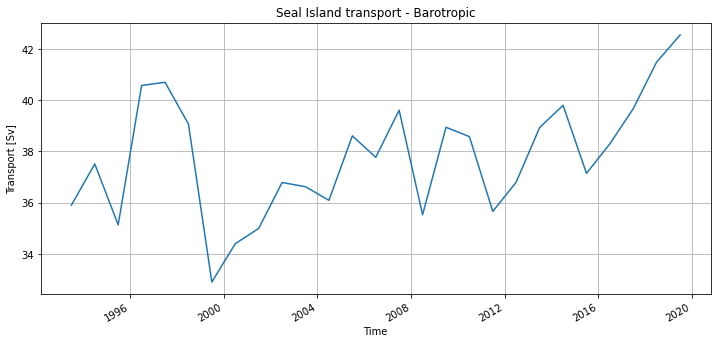

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(tbar/1e6).plot(ax=ax)
ax.set_title('Seal Island transport - Barotropic')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


Match with Nicolas not that good...
Did he only select data from the depth of the shelf?

## Full current transport

In [10]:
t, across, along = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal,
                                     barotropic=False)

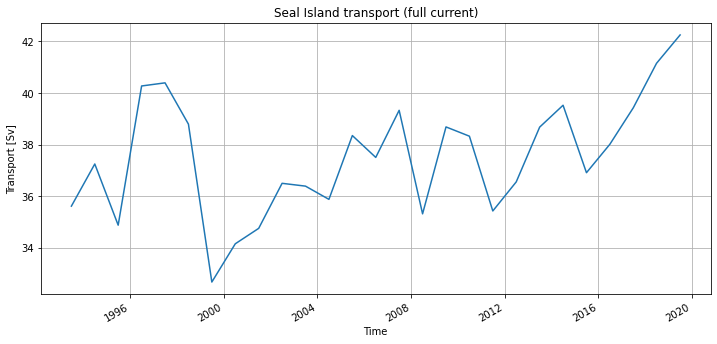

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(t/1e6).plot(ax=ax)
ax.set_title('Seal Island transport (full current)')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


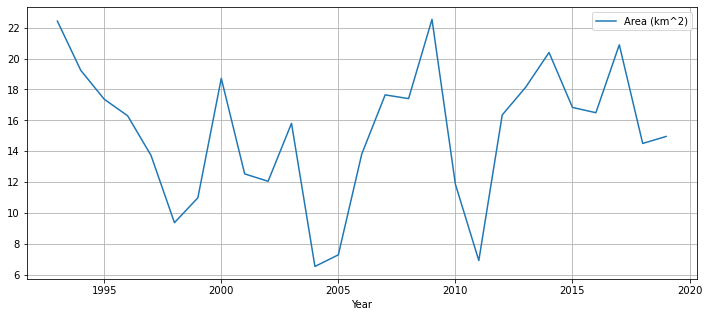

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

cil.plot(x='Year', y='Area (km^2)', ax=ax)
ax.grid()

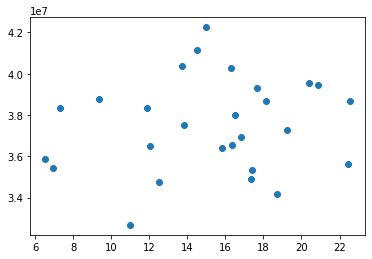

In [13]:
plt.scatter(cil['Area (km^2)'],t.values)

# JJA mean transport


In [14]:
data_dir='/home/soontiensn/data/cmems2020-oceanstatereport/data/netcdf/GLORYSv12/monthly-means/'
f = glob.glob(os.path.join(data_dir,'*_JJA.nc'))
d = xr.open_mfdataset(f)
dsel = d.sel(
             latitude=slice(lat_min, lat_max),
             longitude=slice(lon_min, lon_max))

In [15]:
dsel

<xarray.Dataset>
Dimensions:    (time: 27, bnds: 2, longitude: 49, latitude: 37, depth: 50)
Coordinates:
  * time       (time) datetime64[ns] 1993-07-16T12:00:00 ... 2019-07-16T12:00:00
  * longitude  (longitude) float32 -56.0 -55.92 -55.83 ... -52.17 -52.08 -52.0
  * latitude   (latitude) float32 53.0 53.08 53.17 53.25 ... 55.83 55.92 56.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
Attributes: (12/29)
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    title:                     daily mean fields from Global Ocean Physics An...
    easting:                   longitude
    ...                        ...
    z_min:                     0.494025
    z_max:                     5727.917
    NCO:                       4.7.2
    nco_openmp_thread_number:  1
    frequency:                 mon
    CDO:                       Climate Data Operators version 2.0.3 (https://...

In [16]:
t, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal,
                                     )

In [17]:
t

<xarray.DataArray (time: 27)>
dask.array<add, shape=(27,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-07-16T12:00:00 ... 2019-07-16T12:00:00
    longitude  float64 -55.92
    latitude   float64 53.15
    depth      float32 0.494
Attributes:
    units:       m^3/s
    short_name:  transport
    long_name:   Volume Transport

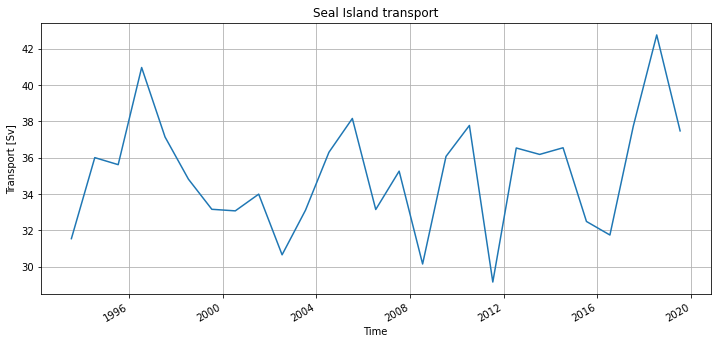

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(t/1e6).plot(ax=ax)
ax.set_title('Seal Island transport')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


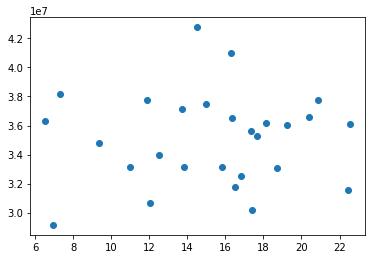

In [19]:
plt.scatter(cil['Area (km^2)'],t.values)

# Full current

In [20]:

tfull, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal, barotropic=False
                                     )

(3000.0, 0.0)

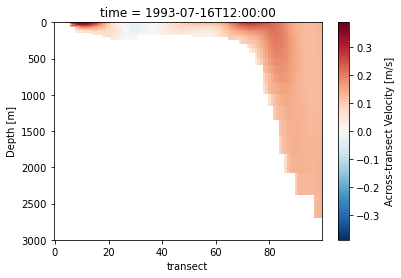

In [21]:
fig, ax = plt.subplots(1,1)
across.isel(time=0).plot(ax=ax)
ax.set_ylim([3000,0])

# Truncate transect to Shelf only

This will be easy with the cummulative transport!!

In [22]:
num_points=100
transect=seal
lons = np.linspace(transect.lon1.values[0],
                    transect.lon2.values[0],
                    num=num_points)
lats = np.linspace(transect.lat1.values[0],
                    transect.lat2.values[0],
                    num=num_points)
dir_east_perp = transect['Dir-E'].values[0]
dir_north_perp = transect['Dir-N'].values[0]
transect_vector = transport.vectorize_transect(lons, lats,
                                         dir_east_perp,
                                         dir_north_perp)
mask_transect = transport.interpolate_transect(mask.mask, lons, lats, method='nearest')
e3t_transect = transport.interpolate_transect(coords.e3t, lons, lats, method='nearest')
H = (mask_transect*e3t_transect).sum(dim='depth', skipna=True)
H = H.where(H!=0)

In [23]:
across_depth_int = transport.depth_integrate(across, mask_transect, e3t_transect)

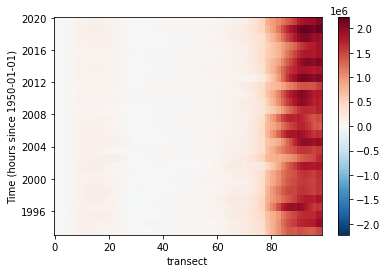

In [24]:
transport2 = across_depth_int[:,:-1]*np.abs(transect_vector)
transport2.plot()

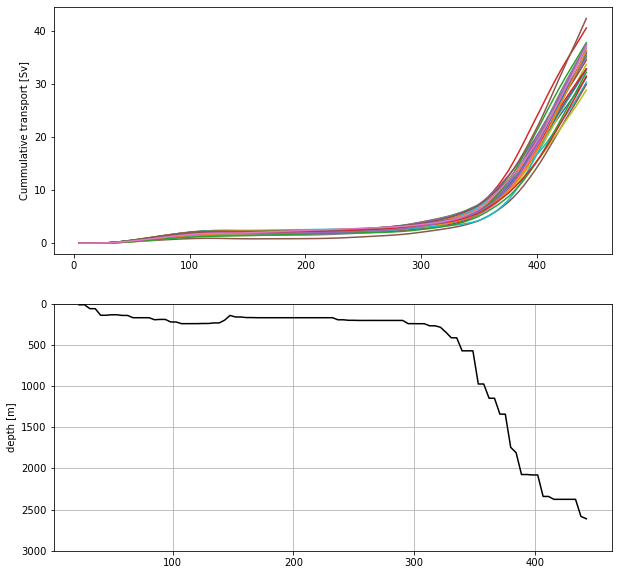

In [25]:
transport_cumsum = transport2.cumsum(dim='transect')
distance = np.abs(transect_vector).cumsum()/1e3
fig,axs = plt.subplots(2,1, figsize=(10,10))
ax=axs[0]
for i in range(transport_cumsum.shape[0]):
    ax.plot(distance, transport_cumsum.isel(time=i)/1e6)
ax.set_ylabel('Cummulative transport [Sv]')
ax2=axs[1]
ax2.plot(distance, H[:-1], 'k')
ax2.set_ylim([3000,0])
ax2.set_ylabel('depth [m]')
ax2.grid()

Ok, now I can build a time series of transport over the shelf. I will cut it off at the 500 m isboath.



Text(0, 0.5, 'Cummulative transport [Sv]')

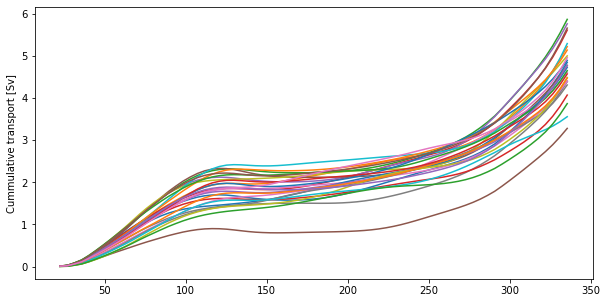

In [26]:
shelf_transport = transport_cumsum.where(H[:-1]<500)
fig,ax = plt.subplots(1,1, figsize=(10,5))
for i in range(shelf_transport.shape[0]):
    ax.plot(distance,shelf_transport.isel(time=i)/1e6)
ax.set_ylabel('Cummulative transport [Sv]')

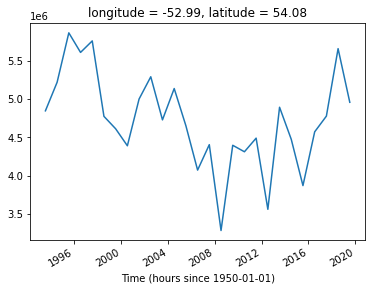

In [27]:
shelf_time_series = shelf_transport.dropna(dim='transect').isel(transect=-1)
shelf_time_series.plot()

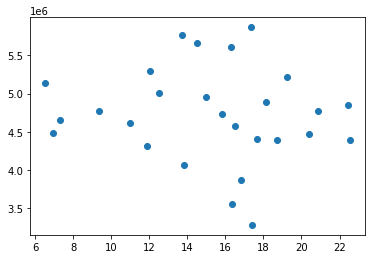

In [28]:
plt.scatter(cil['Area (km^2)'],shelf_time_series.values)

How does Nico's transect compare to Fred's?

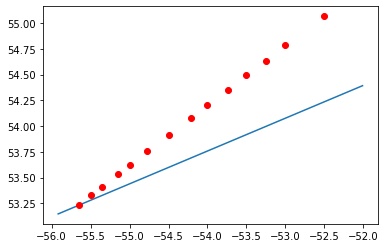

In [29]:
TRANSECT='SealIsland'
azmp_seal = pd.read_table('../../data/csv/transects/{}/{}.txt'.format(TRANSECT, TRANSECT.lower()), 
                         delimiter=' ')


fig, ax = plt.subplots(1,1)
ax.plot([transect.lon1.values[0],
        transect.lon2.values[0]],
        [transect.lat1.values[0],
        transect.lat2.values[0]])
ax.plot(azmp_seal.LON.values, azmp_seal.LAT.values, 'ro')

Yikes, looks like there is a pretty large discrepancy between Fred's/Nico's transects

Plan: Recompute CIL along Nico's transect (summer averages)

# Rebuild CIL from JJA along Nico's transect

In [30]:
temp = transport.interpolate_transect(dsel.thetao,lons,lats)


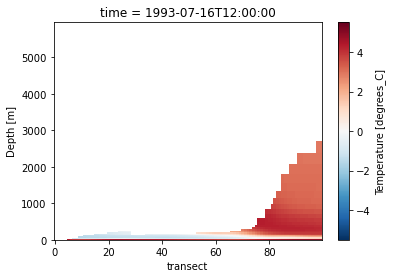

In [31]:
temp.isel(time=0).plot()

In [32]:
temp_CIL = temp.where(temp<0)

(500.0, 0.0)

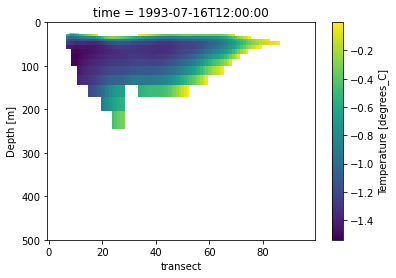

In [33]:
fig,ax=plt.subplots(1,1)
temp_CIL.isel(time=0).plot(ax=ax)
ax.set_ylim([500,0])

In [34]:
temp_CIL_mask = xr.where(temp<0, 1,0)
temp_CIL_depth_int = transport.depth_integrate(temp_CIL_mask,mask_transect,e3t_transect)

In [35]:
CIL_area = (temp_CIL_depth_int[:,:-1]*np.abs(transect_vector)).sum(dim='transect')/1e6

Text(0, 0.5, 'CIL Area[km^2])')

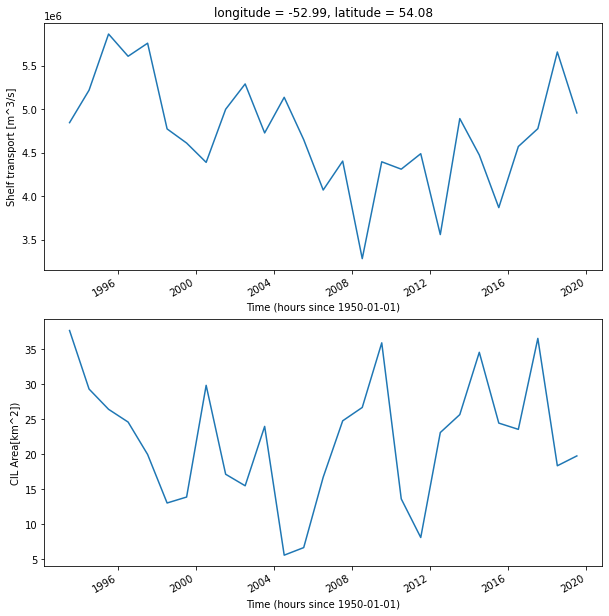

In [36]:
fig, axs= plt.subplots(2,1,figsize=(10,10))
ax=axs[0]
shelf_time_series.plot(ax=ax)
ax.set_ylabel('Shelf transport [m^3/s]')
ax=axs[1]
CIL_area.plot(ax=ax)
ax.set_ylabel('CIL Area[km^2])')

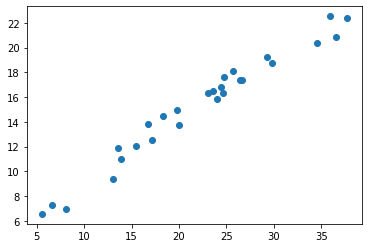

In [37]:
plt.scatter(CIL_area.values, cil['Area (km^2)'])

Ok, I'm confident my CIL calculation along Nico's transect are consistent with my previous estimates.

Now compare transport and CIL Area along Nico's Seal Island transect

Text(0, 0.5, 'Shelf transport [m^3/s]')

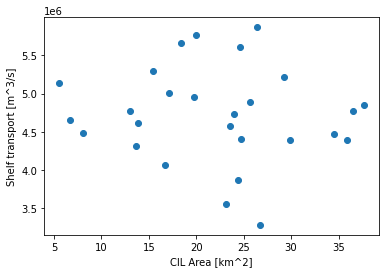

In [38]:
fig, ax = plt.subplots(1,1)
ax.scatter(CIL_area.values,shelf_time_series.values)
ax.set_xlabel('CIL Area [km^2]')
ax.set_ylabel('Shelf transport [m^3/s]')

# Correlations and lags
Goal- Look at the correlation between transport and CIL area. Also look at lagged correlations

In [39]:
def correlation_lagged( CIL, transport, lag_year,ax):
    if lag_year >0:
        x = CIL[0:-lag_year]
        y = transport[lag_year:]
    elif lag_year ==0:
        x = CIL
        y = transport
    else:
        x = CIL[-lag_year:]
        y = transport[:lag_year]
    r, p = scipy.stats.pearsonr(x,y )
    ax.scatter(x,y)
    ax.set_xlabel('CIL Area [km^2]')
    ax.set_ylabel('Shelf transport [m^3/s]')
    ax.set_title('Lag year {} and r= {}'.format(lag_year, r))
    return r

Lagged scatter plot - transport +1 year

/tmp/ipykernel_13243/2842560419.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1)


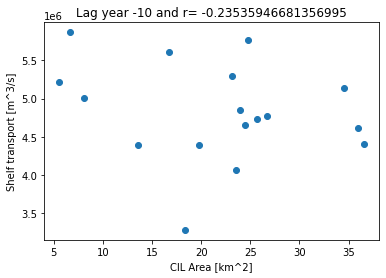

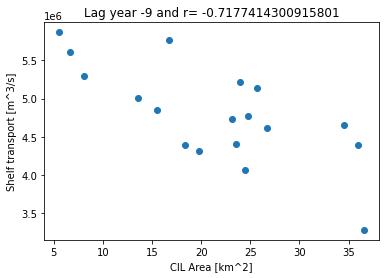

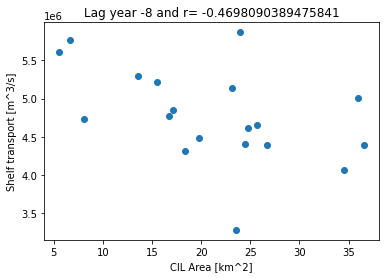

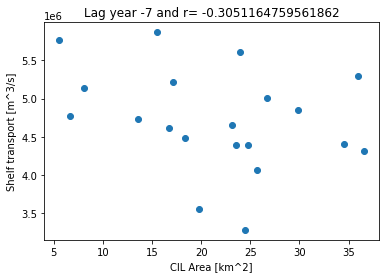

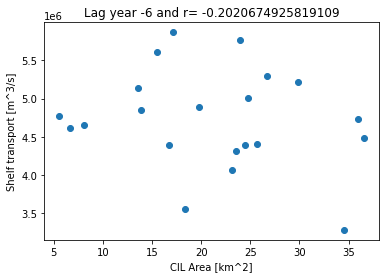

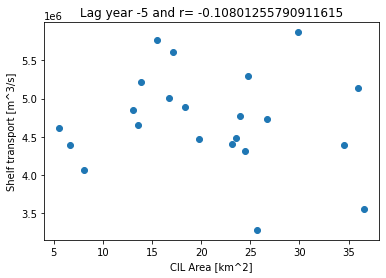

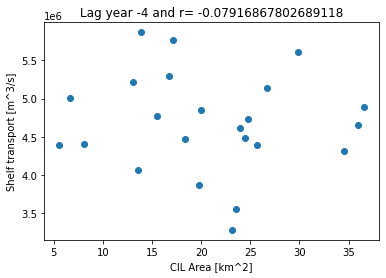

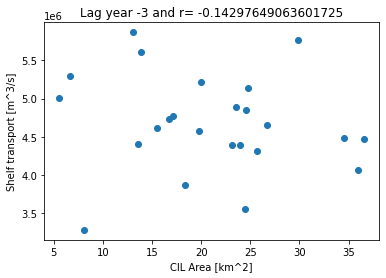

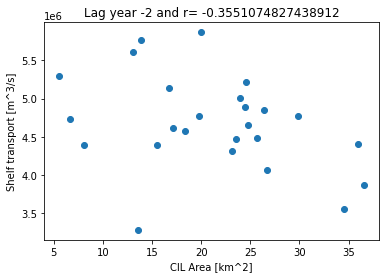

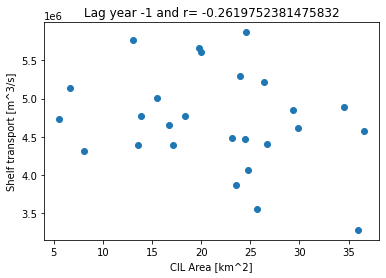

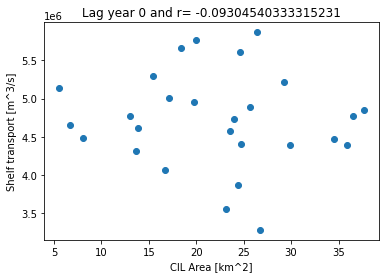

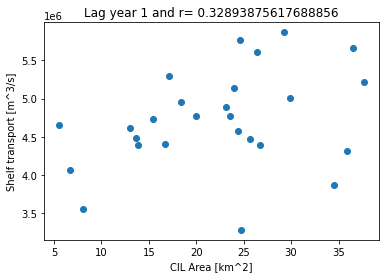

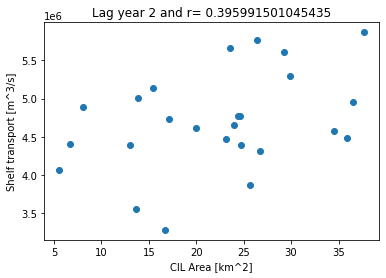

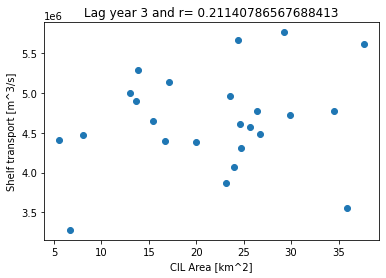

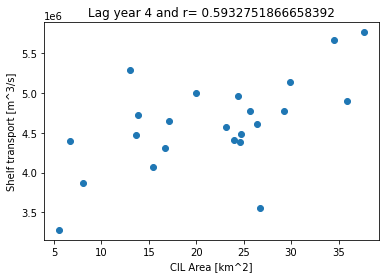

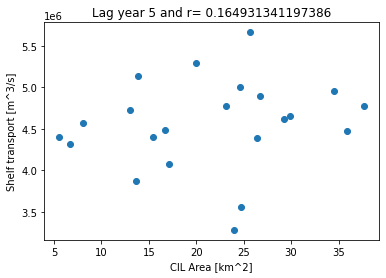

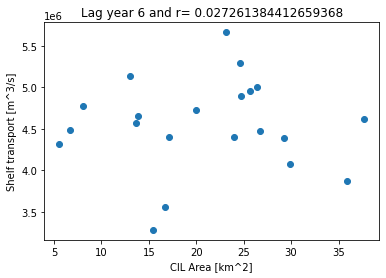

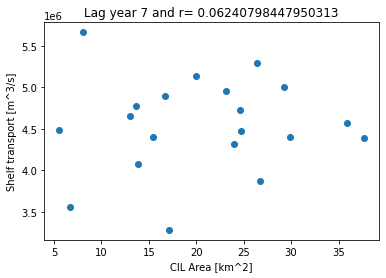

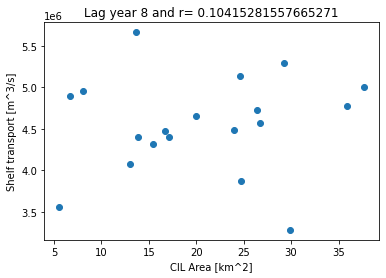

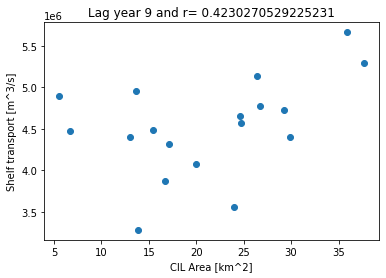

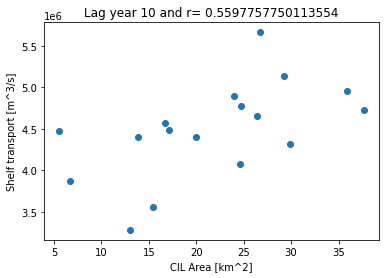

In [40]:
lag_years = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1, 0,1,2,3,4,5,6,7,8,9,10]
rs = []
for lag_year in lag_years:
    fig,ax = plt.subplots(1,1)
    r = correlation_lagged(CIL_area.values,shelf_time_series.values, lag_year, ax)
    rs.append(r)

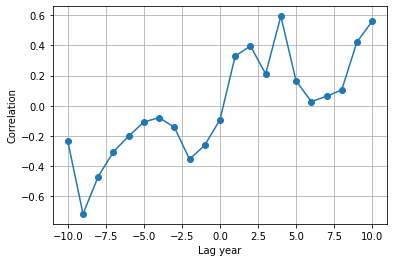

In [41]:
fig, ax = plt.subplots(1,1)
ax.plot(lag_years, rs, 'o-')
ax.set_xlabel('Lag year')
ax.set_ylabel('Correlation')
ax.grid()